In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
ap_1 = pd.read_csv(r"C:\Users\pvs31\Desktop\Data Science Project\OP-heist-project\data\combined\percent_ind_per_region_eng.csv")
ap_2 = pd.read_csv(r"C:\Users\pvs31\Desktop\Data Science Project\OP-heist-project\data\region\employment_by_industry_distribution_per_region.csv")

pivot_df = ap_2.pivot_table(index='Area', columns='Industry', values='Employment',aggfunc='first')
pivot_df.reset_index(inplace=True)
pivot_df.fillna(0, inplace=True)

row_sums = pivot_df.iloc[:, 1:].sum(axis=1)
pivot_df['C, L from second'] = 1 - row_sums
pivot_df["Area_mod"] = pivot_df["Area"].str[5:]

merged_df = pivot_df.merge(ap_1, left_on='Area_mod', right_son='Area', how='left')

merged_df['D, E'] = merged_df['D'] + merged_df['E']
merged_df['R, S'] = merged_df['R'] + merged_df['S']
merged_df['C, L'] = merged_df['C'] + merged_df['L']
merged_df = merged_df.drop(columns=["Area_mod","Area_y","Unnamed: 0","R","S","D","E","C","L"])

sorted_columns = sorted(merged_df.columns, key=lambda x: x[0])
merged_df = merged_df[sorted_columns]

In [86]:
abs_diff_columns = []

for i in range(1, len(merged_df.columns)-1, 2):
    col1 = merged_df.columns[i]
    col2 = merged_df.columns[i + 1]
    abs_diff_col = merged_df[col1] - merged_df[col2]
    abs_diff_columns.append(abs_diff_col.abs())

# Create a DataFrame with the absolute differences
abs_diff_df = pd.concat(abs_diff_columns, axis=1)
abs_diff_df.columns = [f'Abs_Diff_{col1}_{col2}' for col1, col2 in zip(merged_df.columns[1::2], merged_df.columns[2::2])]

area_column = merged_df['Area_x'].to_frame()
result_df = pd.concat([area_column, abs_diff_df], axis=1)

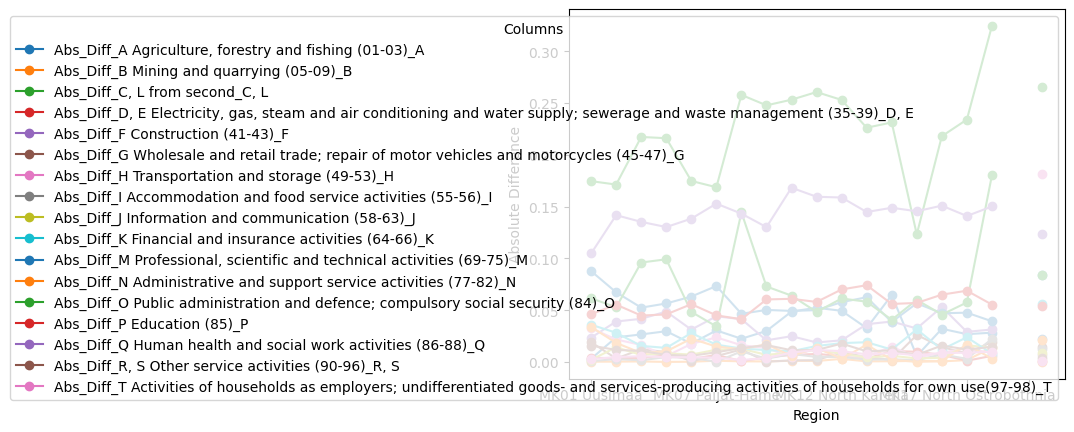

In [87]:
# Set 'Area' column as the index for plotting
result_df.set_index('Area_x', inplace=True)

# Create a line chart for the absolute differences
result_df.plot(kind='line', marker='o')

# Add labels and a legend
plt.xlabel('Region')
plt.ylabel('Absolute Difference')
plt.legend(title='Columns', loc='best')

# Show the plot
plt.show()